In [38]:
# task 3
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.signal import convolve2d
import itertools

In [41]:
im = np.array(Image.open('hol_sklad_big.png'))
im_r = im[:,:,0]
im_g = im[:,:,1]
im_b = im[:,:,2]
im = im_r
N = 25
im = np.pad(im, [0, N - 1], mode='constant')

In [42]:
def normf(im):
    im1 = im.astype(np.float)
    im2 = (im1 - im1.min())/(im1.max()-im1.min())
    return im2

In [43]:
def LoG(N):
    sigma = N/6
    x = np.linspace(-3*sigma, 3*sigma, N)
    y = np.linspace(-3*sigma, 3*sigma, N)
    Y, X = np.meshgrid(y, x)
    g = (X**2 + Y**2 -2*sigma**2)/(sigma**4)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
    return g

In [44]:
log = LoG(25)
im_n = normf(im)
im_f = convolve2d(im_n, log, mode='same', boundary='fill', fillvalue=0)
im_f_n = normf(im_f)

C:\Users\Wanya\AppData\Local\Temp\ipykernel_15600\1725128868.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im1 = im.astype(np.float)


In [45]:
T = 0.4
im_f_n_T = im_f_n > T

Text(0.5, 1.0, '$LoG+threshold$')

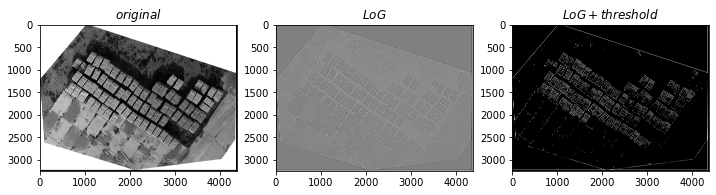

In [46]:
plt.figure(figsize = (12,10))
plt.subplot(131)
plt.imshow(im_n, 'gray', vmin=0, vmax=1)
plt.title('$original$')
plt.subplot(132)
plt.imshow(im_f_n, 'gray', vmin=0, vmax=1)
plt.title('$LoG$')
plt.subplot(133)
plt.imshow(1-im_f_n_T, 'gray', vmin=0, vmax=1)
plt.title('$LoG+threshold$')

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import itertools

In [128]:
im1 = np.array(Image.open('hol_sklad_big.png'), dtype=np.float64)
im1 = im1[:,:,:3]
Isub = im1[2000:2257, 2075:2286]

im1 = im1 / 255.
Isub = Isub / 255.

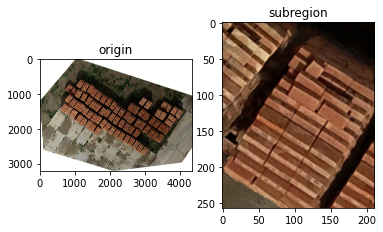

In [129]:
plt.figure()
plt.subplot(121)
plt.imshow(im1)
plt.title("origin")
plt.subplot(122)
plt.imshow(Isub)
plt.title("subregion")
plt.show()

In [130]:
ar = np.mean(Isub[:,:,0])
ag = np.mean(Isub[:,:,1])
ab = np.mean(Isub[:,:,2])

a = np.array([ar,ag,ab])

In [133]:
x,y,z = np.shape(Isub)
Ivec = Isub.reshape(x*y, z)

a = np.mean(Ivec, axis = 0)
C = np.cov(Ivec.T)

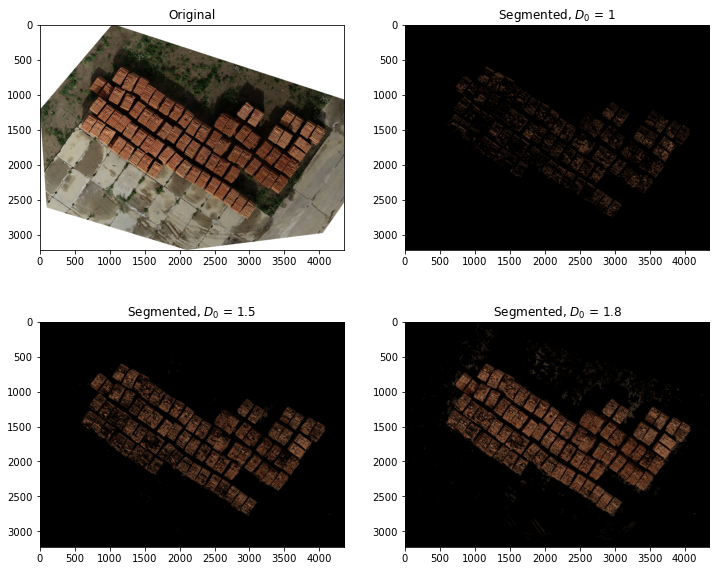

In [134]:
m, n, l = np.shape(im1)
D = np.zeros((m, n))

C_inv = np.linalg.inv(C)

for i,j in itertools.product(range(m), range(n)):
    z = im1[i, j, :]
    D[i, j] = np.sqrt((z-a).T.dot(C_inv).dot(z-a))

D0_values = [1, 1.5, 1.8]

plt.figure(figsize = (12,10))
plt.subplot(221)
plt.imshow(im1)
plt.title('Original')

i = 2
for D0 in D0_values:
    mask = np.zeros((m,n), dtype = int)
    mask[D <= D0] = 1
    mask = np.dstack((mask, mask, mask))
    
    Iseg = im1 * mask
    plt.subplot(2,2,i)
    plt.imshow(Iseg)
    plt.title('Segmented, $D_0$ = '+str(D0))
    
    i += 1

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.1.4
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
bea

tables                        3.6.1
tabulate                      0.8.9
TBB                           0.2
tblib                         1.7.0
tenacity                      8.0.1
terminado                     0.13.1
testpath                      0.5.0
text-unidecode                1.3
textdistance                  4.2.1
threadpoolctl                 2.2.0
three-merge                   0.1.1
tifffile                      2021.7.2
tinycss                       0.4
tldextract                    3.2.0
toml                          0.10.2
tomli                         1.2.2
toolz                         0.11.2
tornado                       6.1
tqdm                          4.64.0
traitlets                     5.1.1
Twisted                       22.2.0
twisted-iocpsupport           1.0.2
typed-ast                     1.4.3
typing_extensions             4.1.1
ujson                         5.1.0
Unidecode                     1.2.0
urllib3                       1.26.9
w3lib                      